In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from google.colab import files
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
train = pd.read_csv("train.csv")
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [ ]:
test = pd.read_csv("test.csv")
test.head(5)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train['City'].unique()

array(['İstanbul', 'Ankara', 'Diyarbakır', 'Tokat', 'Gaziantep',
       'Afyonkarahisar', 'Edirne', 'Kocaeli', 'Bursa', 'İzmir', 'Sakarya',
       'Elazığ', 'Kayseri', 'Eskişehir', 'Şanlıurfa', 'Samsun', 'Adana',
       'Antalya', 'Kastamonu', 'Uşak', 'Muğla', 'Kırklareli', 'Konya',
       'Karabük', 'Tekirdağ', 'Denizli', 'Balıkesir', 'Aydın', 'Amasya',
       'Kütahya', 'Bolu', 'Trabzon', 'Isparta', 'Osmaniye'], dtype=object)

In [ ]:
train.isna().any().any()

False

Text(0.5, 1.0, 'Distribution plot for revenue')

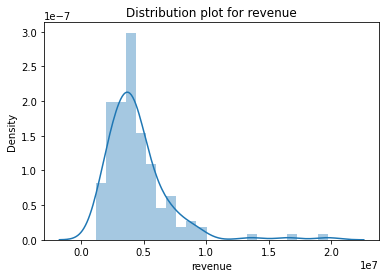

In [ ]:
ax = sns.distplot(train['revenue'])
ax.set_title("Distribution plot for revenue") 

Text(0.5, 1.0, 'Square distribution plot for revenue')

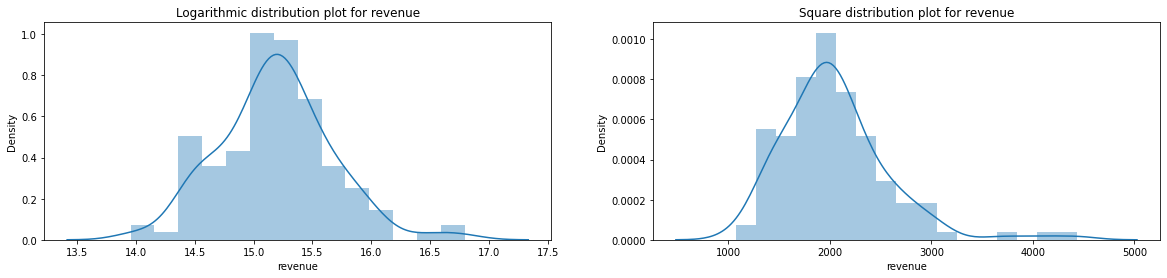

In [ ]:
"fig, ax = plt.subplots(1,2,figsize=(20,4))

sns.distplot(np.log(train['revenue']),ax=ax[0]).set_title("Logarithmic distribution plot for revenue")

sns.distplot(np.sqrt(train['revenue']),ax=ax[1]).set_title("Square distribution plot for revenue")

Training set :
FC    76
IL    60
DT     1
Name: Type, dtype: int64
-------------
Testing set :
FC    23266
IL    16601
DT      884
MB      126
Name: Type, dtype: int64


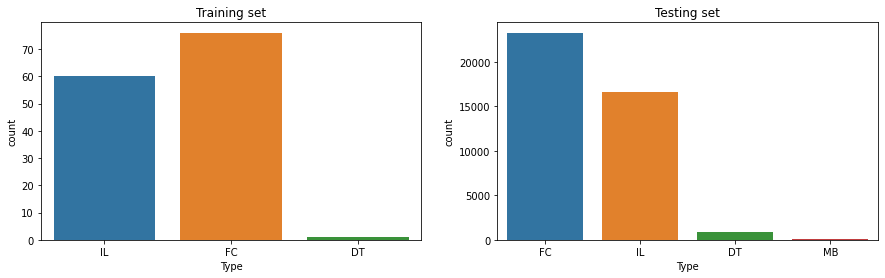

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,4))
sns.countplot(x=train['Type'],ax=ax[0]).set_title("Training set")
print("Training set :")
print(train['Type'].value_counts())

sns.countplot(x=test['Type'],ax=ax[1]).set_title("Testing set")
print("-------------")
print("Testing set :")
print(test['Type'].value_counts())

Training set :
Big Cities    78
Other         59
Name: City Group, dtype: int64
-------------
Testing set :
Other         50728
Big Cities    49272
Name: City Group, dtype: int64


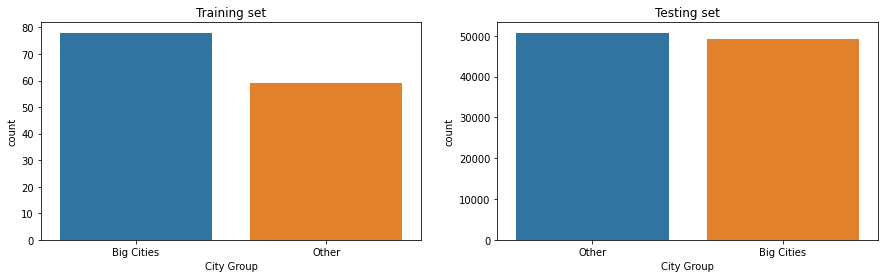

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,4))
sns.countplot(x=train['City Group'],ax=ax[0]).set_title("Training set")
print("Training set :")
print(train['City Group'].value_counts())

sns.countplot(x=test['City Group'],ax=ax[1]).set_title("Testing set")
print("-------------")
print("Testing set :")
print(test['City Group'].value_counts())

Text(0.5, 1.0, 'Countplot for City - Training set')

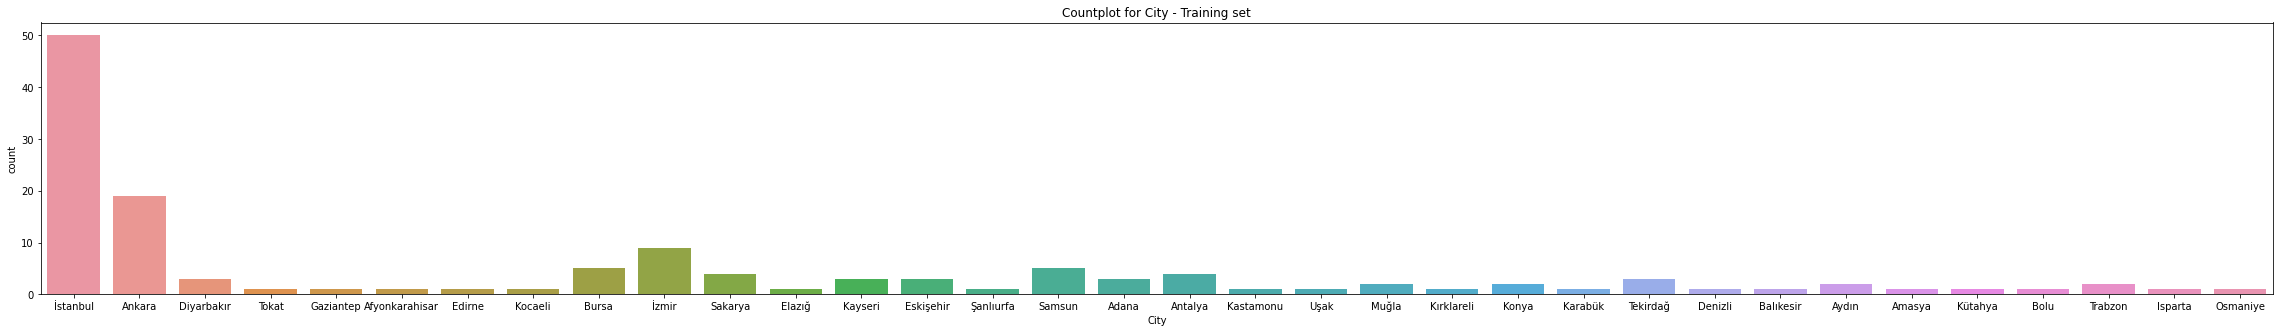

In [ ]:
plt.figure(figsize=(40,5))
sns.countplot(x=train['City']).set_title("Countplot for City - Training set") 

Text(0.5, 1.0, 'Countplot for City - Testing set')

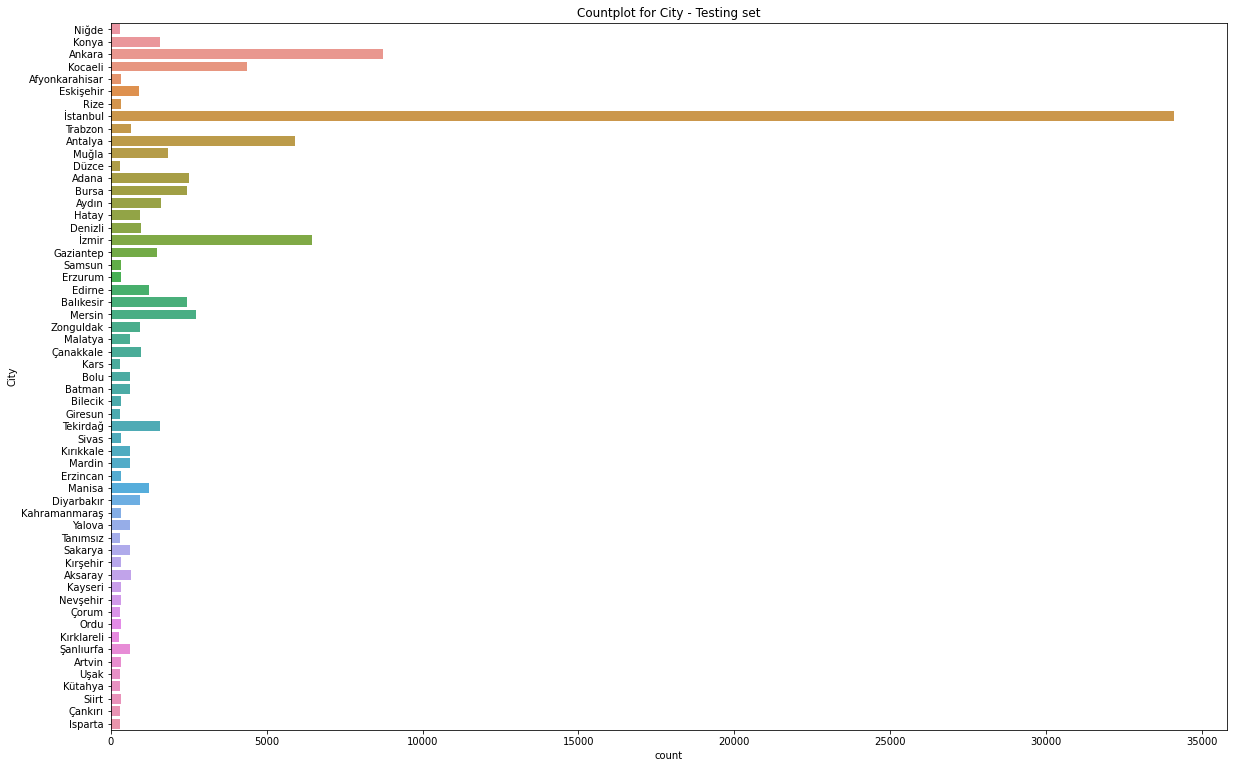

In [ ]:
plt.figure(figsize=(20,13))
sns.countplot(y=test['City']).set_title("Countplot for City - Testing set")

In [ ]:
print("Number of cities in training set :",train['City'].nunique())
print("Number of cities in testing set :",test['City'].nunique())

Number of cities in training set : 34
Number of cities in testing set : 57


In [ ]:
counts = train['City'].value_counts() #counts unique values
percent = ((train['City'].value_counts()/train['City'].value_counts().sum())*100).round(1).astype(str) + '%'
pd.DataFrame({'count':counts,'percentage':percent}).head(5)

,count,percentage
İstanbul,50,36.5%
Ankara,19,13.9%
İzmir,9,6.6%
Bursa,5,3.6%
Samsun,5,3.6%


In [ ]:
num_fea = train.drop(['Id','Open Date','City','City Group','Type','revenue'],axis=1)

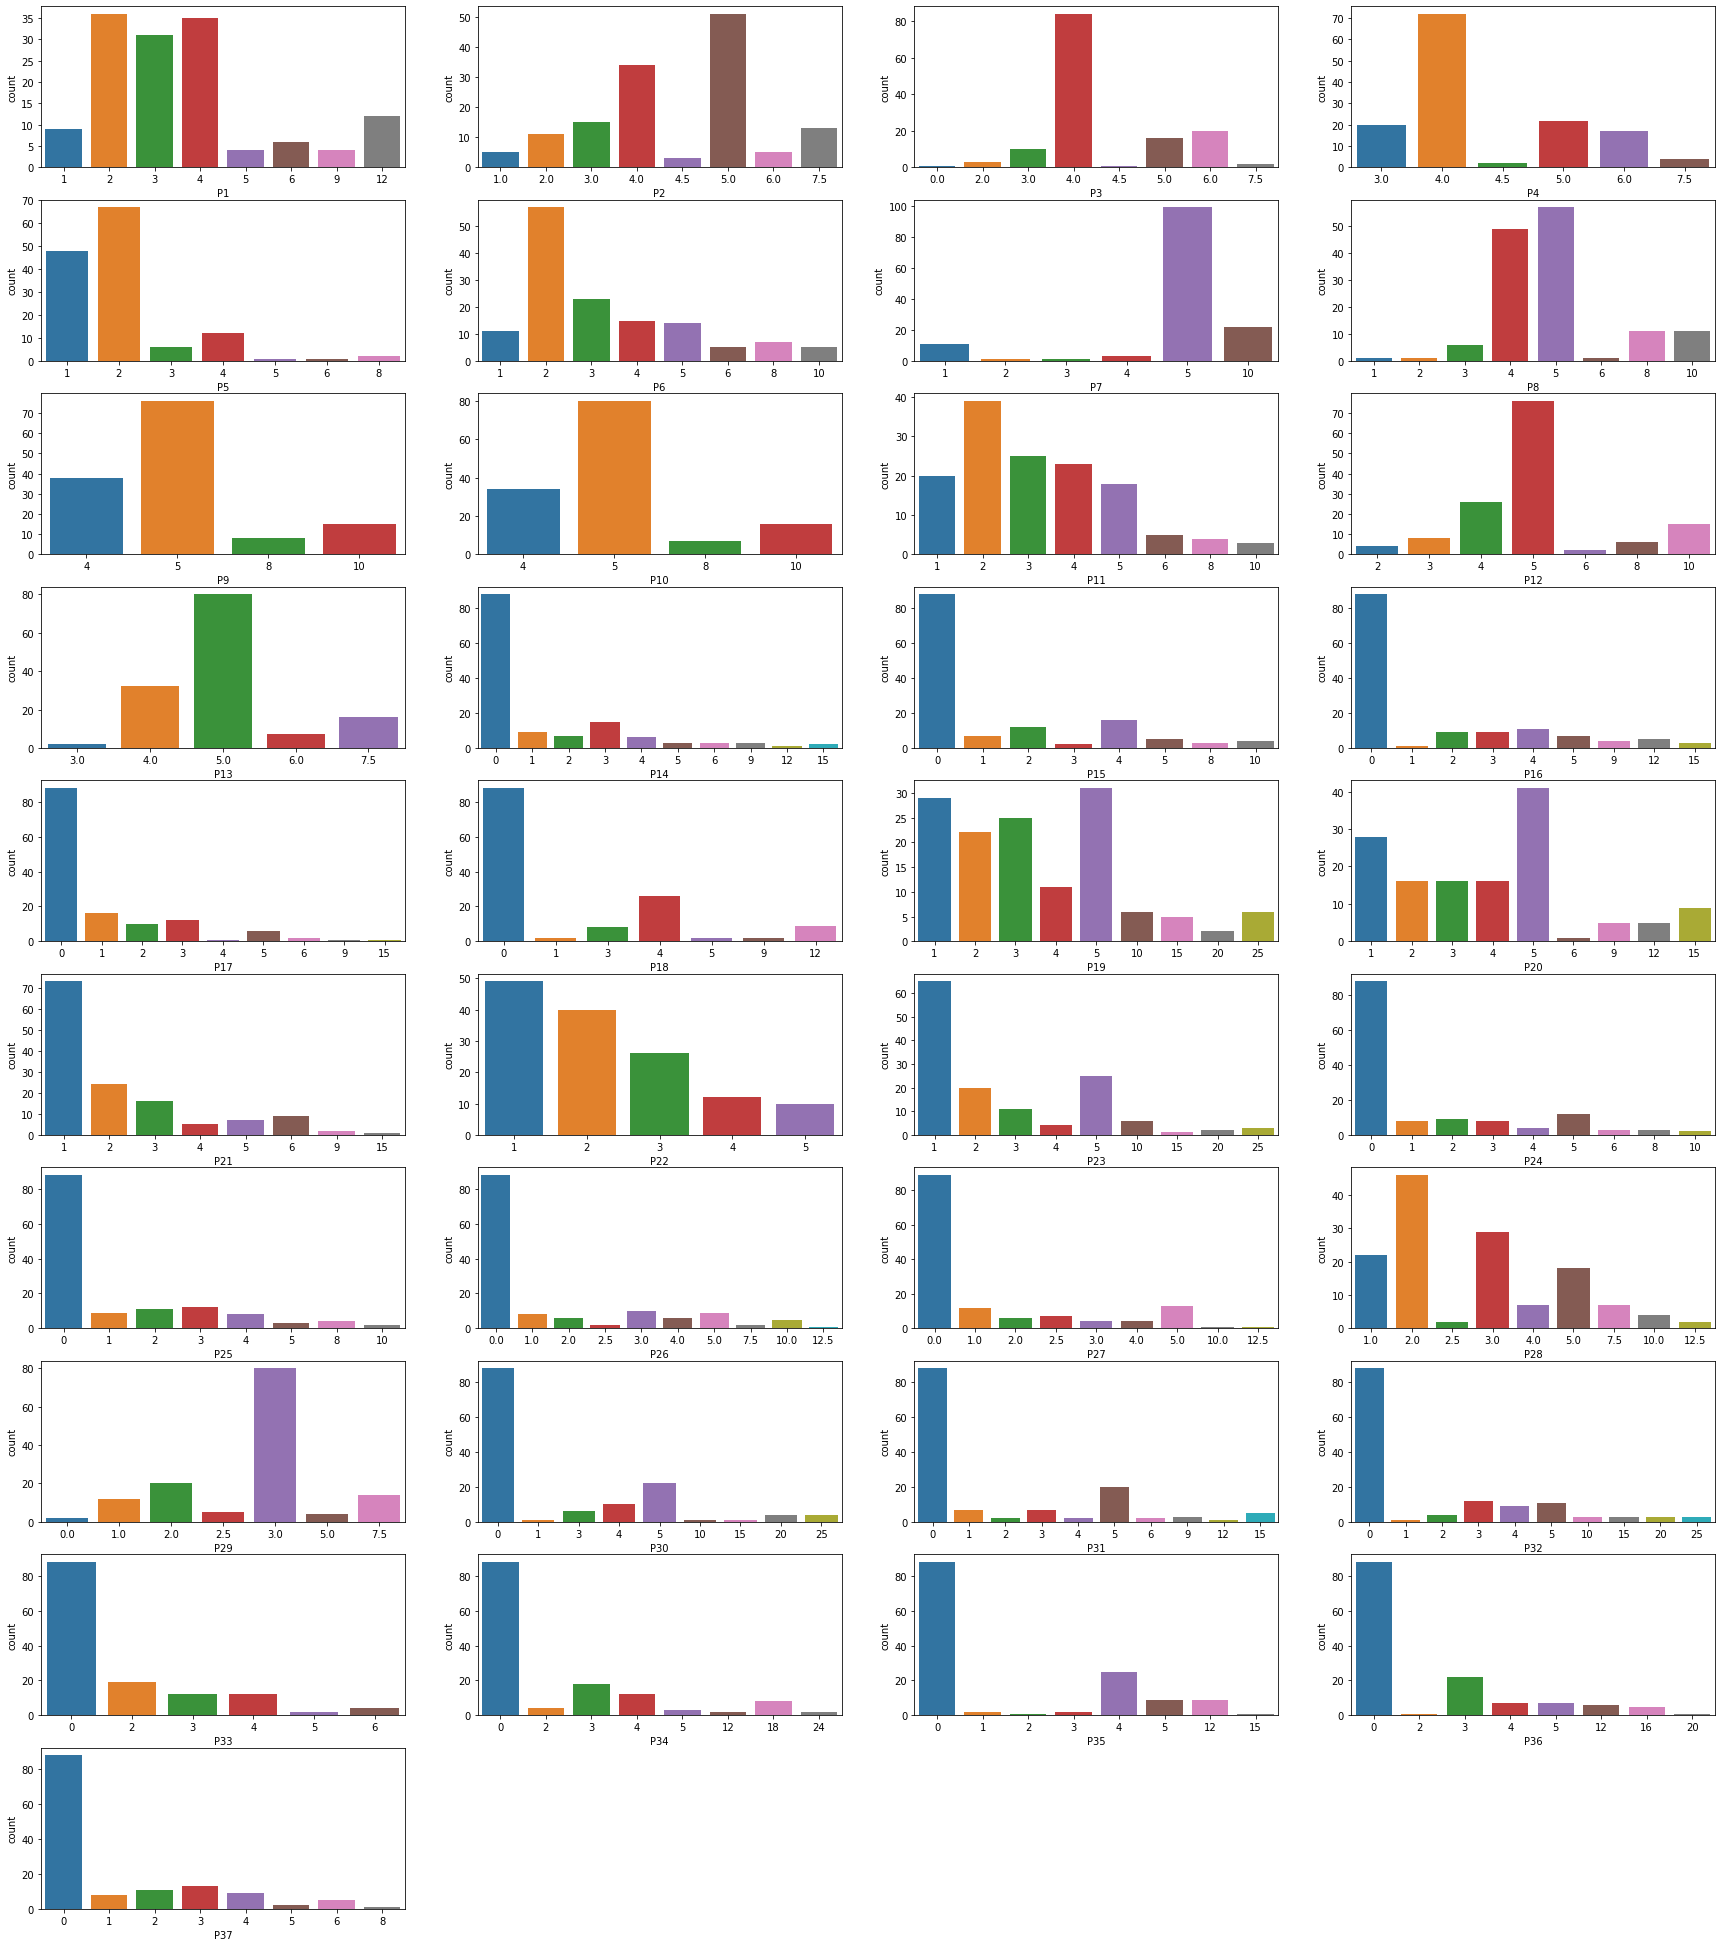

In [ ]:
a = 10  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(30,35))

for i in num_fea:
    plt.subplot(a, b, c)
    sns.countplot((num_fea[i]))
    c = c + 1

[Text(0.5, 1.0, 'Violinplot for Type vs Revenue')]

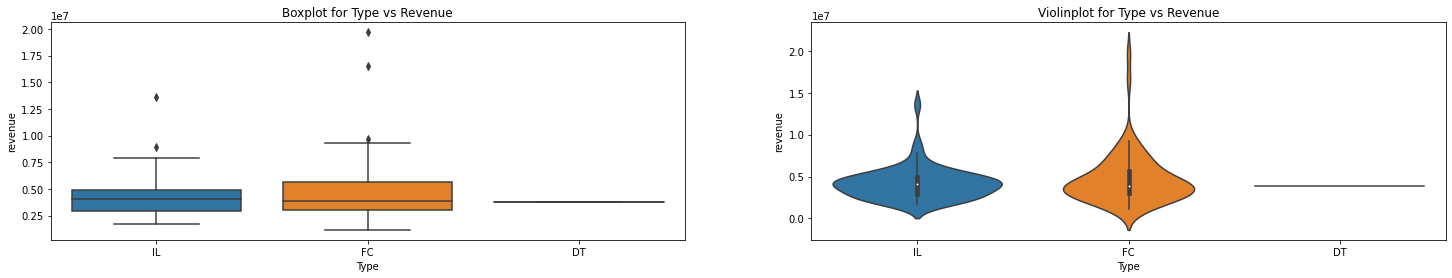

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(25,4))    
sns.boxplot(y=train['revenue'],x=train['Type'],ax=ax[0]).set(title='Boxplot for Type vs Revenue')
sns.violinplot(y=train['revenue'],x=train['Type'],ax=ax[1]).set(title='Violinplot for Type vs Revenue')

[Text(0.5, 1.0, 'City Group vs Revenue')]

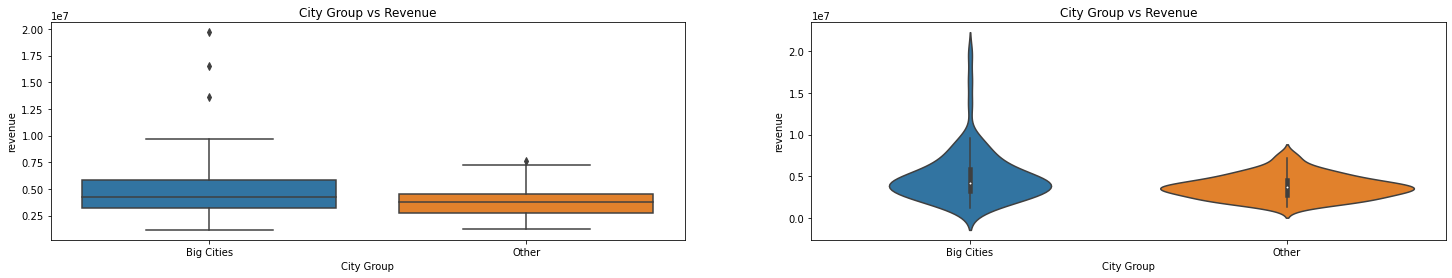

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(25,4))    
sns.boxplot(y=train['revenue'],x=train['City Group'],ax=ax[0]).set(title='City Group vs Revenue')
sns.violinplot(y=train['revenue'],x=train['City Group'],ax=ax[1]).set(title='City Group vs Revenue')

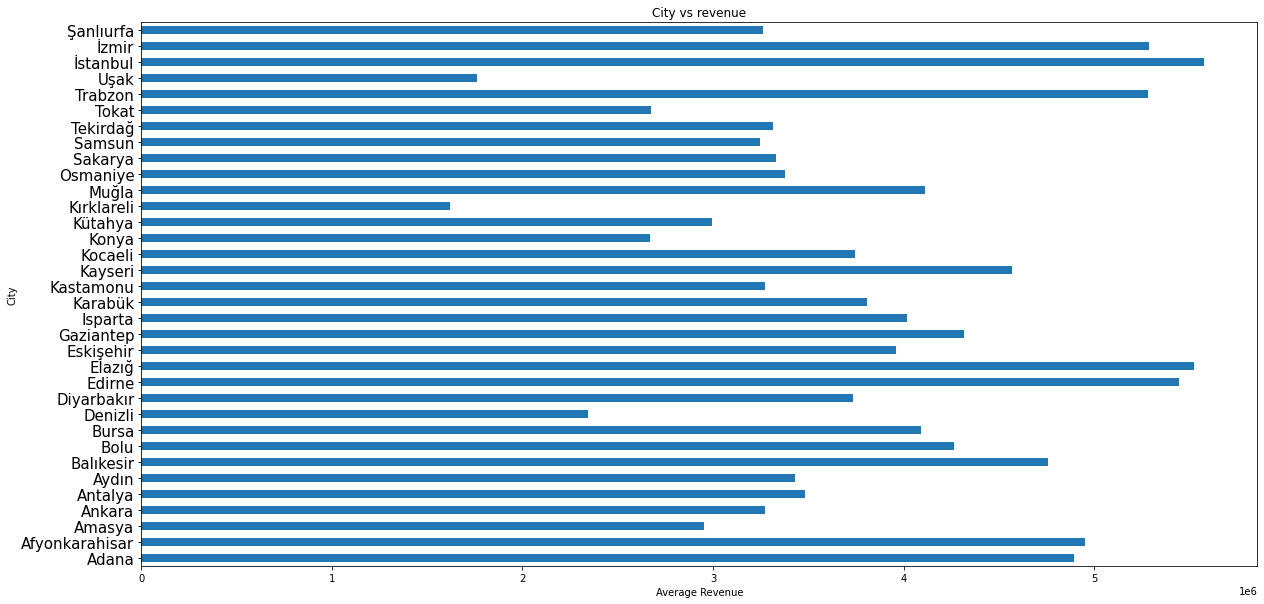

In [ ]:
train.groupby(['City']).mean()['revenue'].plot.barh(figsize=(20,10))
plt.yticks(fontsize=15)
plt.title('City vs revenue')
plt.xlabel('Average Revenue')
plt.show()

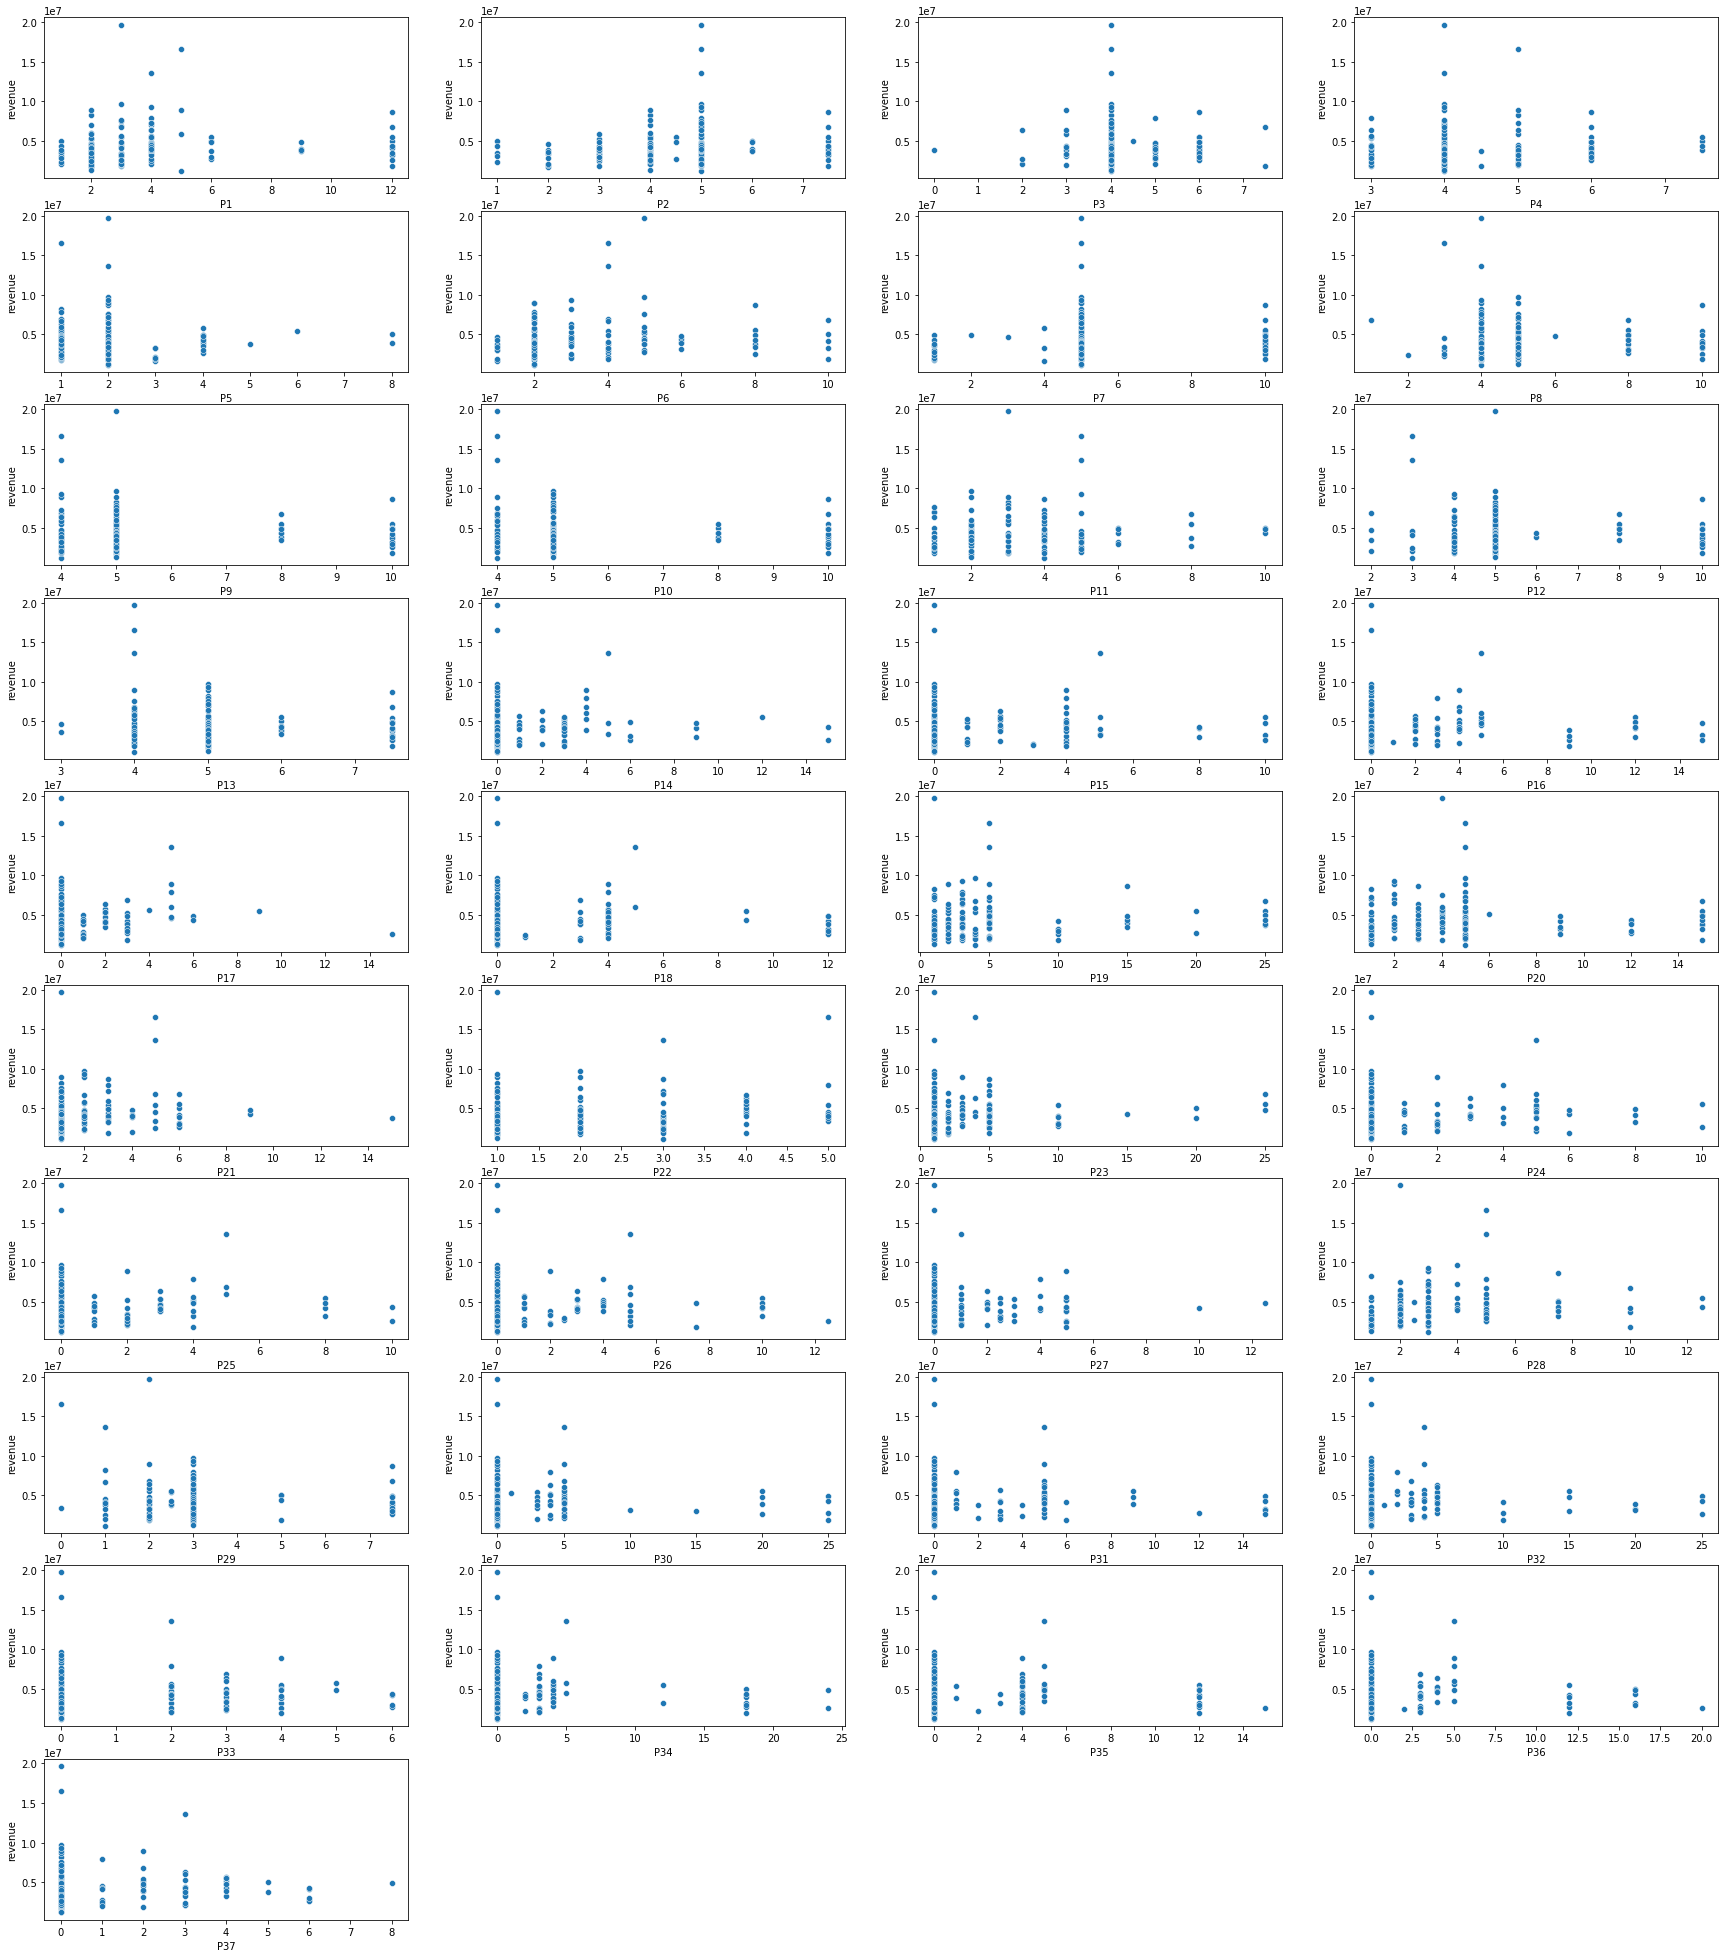

In [ ]:
a = 10  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(30,35))

for i in num_fea:
    plt.subplot(a, b, c)
    sns.scatterplot(y=train['revenue'],x=num_fea[i])
    c = c + 1

In [ ]:
#generating new features from 'Open Date' feature
def newFeatures(df):
  df['Date'] = pd.to_datetime(df['Open Date'],format="%m/%d/%Y")
  df['Year'] = df['Date'].dt.year
  df['Month'] = df['Date'].dt.month
  df['Years Old'] = pd.to_datetime('23-03-2015').year - df['Date'].dt.year
  df = df.drop(['Open Date','Date'],axis=1)
  return df

train = newFeatures(train)
test = newFeatures(test)

In [ ]:
train.head(5)

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P32,P33,P34,P35,P36,P37,revenue,Year,Month,Years Old
0,0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,4,5,5,4,3,4,5653753.0,1999,7,16
1,1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,0,0,0,0,0,0,6923131.0,2008,2,7
2,2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,0,0,0,0,0,0,2055379.0,2013,3,2
3,3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,10,6,18,12,12,6,2675511.0,2012,2,3
4,4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3,2,3,4,3,3,4316715.0,2009,5,6


In [ ]:
train['Year'].unique()

array([1999, 2008, 2013, 2012, 2009, 2010, 2011, 2000, 2014, 2006, 1998,
       1996, 2004, 2007, 2005, 2002, 1997])

Text(0.5, 1.0, 'Year vs Revenue')

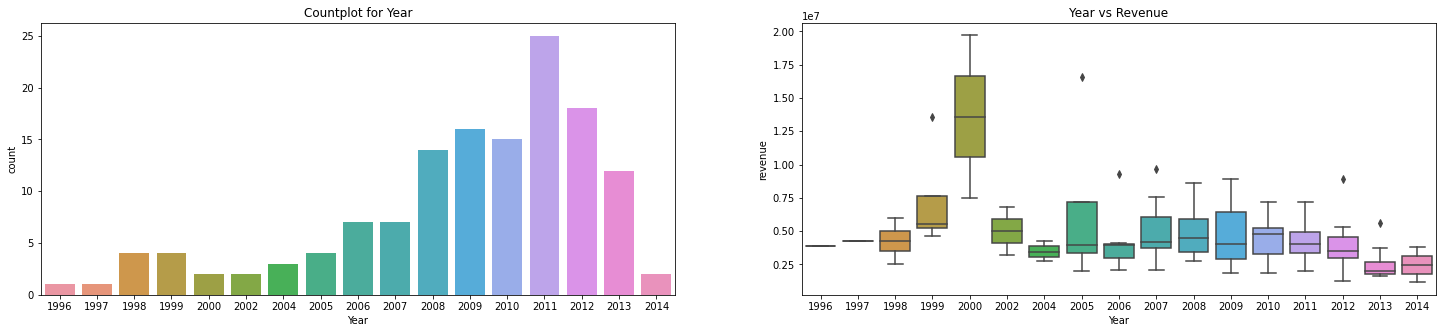

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(25,5))   
sns.countplot(x=train['Year'],ax=ax[0])
ax[0].set_title("Countplot for Year")

sns.boxplot(y=train['revenue'],x=train['Year'],ax=ax[1]).set_title("Year vs Revenue")

Text(0.5, 1.0, 'Distribution of Month vs Revenue')

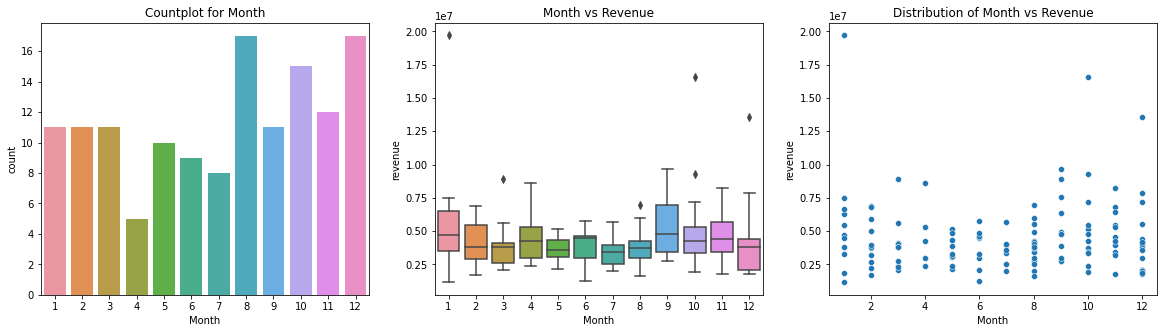

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(20,5))   
sns.countplot(x=train['Month'],ax=ax[0]).set_title("Countplot for Month")

sns.boxplot(x=train['Month'],y=train['revenue'],ax=ax[1])
ax[1].set_title("Month vs Revenue")

sns.scatterplot(x=train['Month'],y=train['revenue'],ax=ax[2])
ax[2].set_title("Distribution of Month vs Revenue")

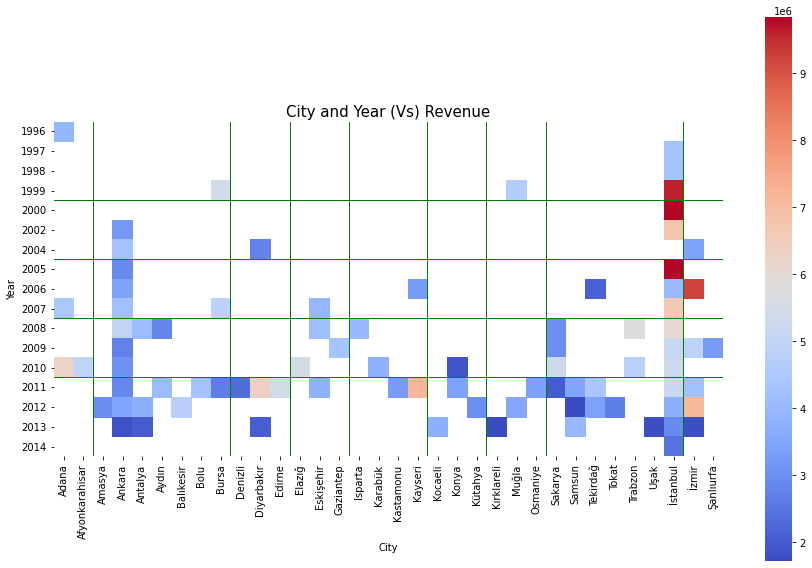

In [ ]:
df = pd.DataFrame({'City':train['City'],'Year':train['Year'],'revenue':train['revenue']})

df_wide=df.pivot_table( index='Year', columns='City', values='revenue' )

fig, ax = plt.subplots(figsize=(15,10))         #linecolors can be 'r', 'g', 'b', 'k', 'y', 'm', 'c'
plot = sns.heatmap(df_wide, annot=False,linewidths=.001,linecolor='g',ax=ax,cmap='coolwarm',robust=True, square=True) #annot=True writes data in rect boxes
plt.title('City and Year (Vs) Revenue',size=15)
plt.show()

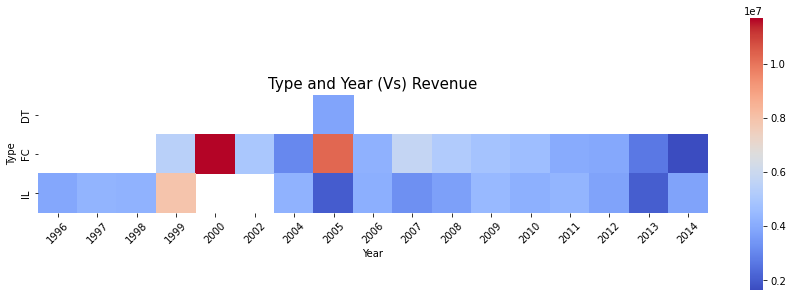

In [ ]:
df = pd.DataFrame({'Type':train['Type'],'Year':train['Year'],'revenue':train['revenue']})

df_wide=df.pivot_table( index='Type', columns='Year', values='revenue' )

fig, ax = plt.subplots(figsize=(15,5))         # Sample figsize in inches
plot = sns.heatmap(df_wide, annot=False,ax=ax,cmap='coolwarm',robust=True, square=True,) #annot=True writes data in rect boxes        
plot.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Type and Year (Vs) Revenue',size=15)
plt.show()                   

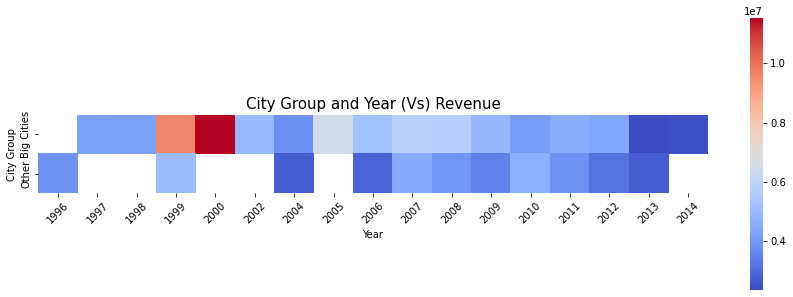

In [ ]:
df = pd.DataFrame({'City Group':train['City Group'],'Year':train['Year'],'revenue':train['revenue']})

df_wide=df.pivot_table( index='City Group', columns='Year', values='revenue' )

fig, ax = plt.subplots(figsize=(15,5))         # Sample figsize in inches
plot = sns.heatmap(df_wide, annot=False,ax=ax,cmap='coolwarm',robust=True, square=True,) #annot=True writes data in rect boxes
plot.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('City Group and Year (Vs) Revenue',size=15)
plt.show()

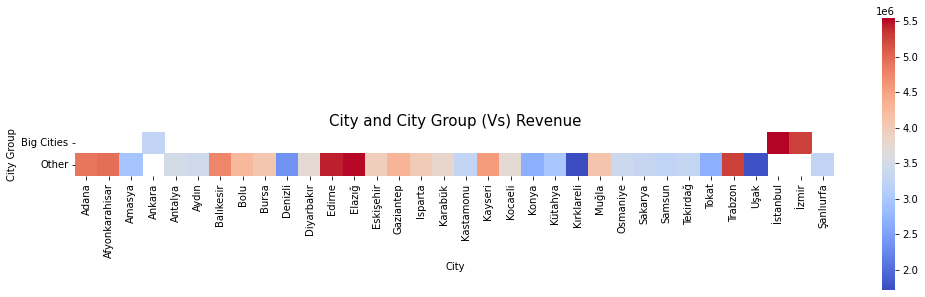

In [ ]:
df = pd.DataFrame({'City Group':train['City Group'],'City':train['City'],'revenue':train['revenue']})

df_wide=df.pivot_table( index='City Group', columns='City', values='revenue')

fig, ax = plt.subplots(figsize=(17,5))         # Sample figsize in inches
plot = sns.heatmap(df_wide, annot=False,ax=ax,cmap='coolwarm',robust=True, square=True) #annot=True writes data in rect boxes
plt.title('City and City Group (Vs) Revenue',size=15)
plt.show()

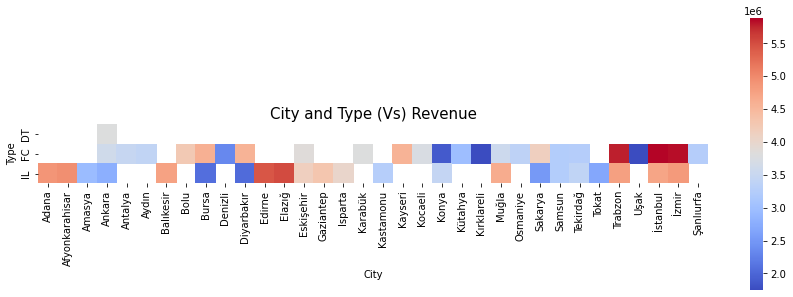

In [ ]:
df = pd.DataFrame({'Type':train['Type'],'City':train['City'],'revenue':train['revenue']})

df_wide=df.pivot_table( index='Type', columns='City', values='revenue')

fig, ax = plt.subplots(figsize=(15,5))         # Sample figsize in inches
plot = sns.heatmap(df_wide, annot=False,ax=ax,cmap='coolwarm',robust=True, square=True,) #annot=True writes data in rect boxes
plt.title('City and Type (Vs) Revenue',size=15)
plt.show()


AttributeError: ignored